# Computer Vision - Assignment 2 - Convolutional Neural Networks for Image Classification

#### 10 (+3) points   |   Due date: November 25 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: <mark>Brian Sena Simons</mark>

The goal of this assignment is to learn how to implement and use CNN models using the Fastai library. 

The goal of this assignmnet is to gain experience designing and training convolutional neural networks, using fast.ai. From a base network architecture that is provided, you have to learn to experiment with it and improve it by adding, modifying or deleting layers from this architecture in the task of classifying images into 25 categories. To carry out this assignment, a help guide is provided to know how:
1. Basic functions of reading data, training and optimization can be performed;
2. Graphs for the evolution of the classification error in
the training and validation sets can be created;
3. The classification error in the test set can be computed.

## Instalación de dependencias. 

In [ ]:
import sys
import subprocess
import pkg_resources

required = {'nbdev', 'fastbook'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed
print(missing)

if 'nbdev' in missing:
    print("INSTALLING nbdev")
    !pip install nbdev
!pip list |grep nbdev    
if 'fastbook' in missing:
    print("INSTALLING fastbook")
    !pip install -Uqq fastbook
!pip list |grep fastbook

{'fastbook', 'nbdev'}
INSTALLING nbdev
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 341 kB/s 
     |████████████████████████████████| 78 kB 3.3 MB/s 
     |████████████████████████████████| 58 kB 578 kB/s 
     |████████████████████████████████| 1.6 MB 54.6 MB/s 
nbdev                         2.3.9
INSTALLING fastbook
     |████████████████████████████████| 719 kB 6.9 MB/s 
     |████████████████████████████████| 5.5 MB 36.8 MB/s 
     |████████████████████████████████| 1.3 MB 49.6 MB/s 
     |████████████████████████████████| 451 kB 47.5 MB/s 
     |████████████████████████████████| 182 kB 59.5 MB/s 
     |████████████████████████████████| 115 kB 56.4 MB/s 
     |████████████████████████████████| 212 kB 48.9 MB/s 
     |████████████████████████████████| 127 kB 47.8 MB/s 
     |████████████████████████████████| 7.6 MB 43.0 MB/s 
fastbook                      0.0.29


In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

Mounted at /content/gdrive
fastcore version 1.5.27 installed
fastai version 2.7.10 installed


In [ ]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# **Exercise 1:** BaseNet in CIFAR100 (4 points)

*Dataset:*
In this exercise, we will work with part of the CIFAR100 dataset. This dataset consists of 60K color images of 32x32x3 (RGB) depicting 100 different classes (600 images per class). There are 50K images for training and 10K for testing. For the development of the exercise we will only consider 25 classes (out of 100). Therefore, the training set has 12,500 images and the test set 2,500 images. 10% of the training set will be used for validation. 

**Model BaseNet:**
We start by creating a base model called *BaseNet* which, after its training and execution, will give us a classification error which will be used as reference or baseline for further improvements. In order to create it (and later improve it), we will use a sensible combination of the following layers:
- Convolutional layers (Conv2D, either normal or atrous), 
- Pooling layers (Local and Global MaxPooling2D and AveragePooling2D), 
- Dense layers (also called fully connected layers), 
- Non-linear activations, (e.g. ReLu, leaky ReLu, etc.), 
- Flattening (i.e. convert 2D features to 1D features),  
- Batch Normalization, 
- and Regularization (e.g. Dropout or weight decay).

Our BaseNet model consists of two convolutional layers (conv-relu) at different scales (MaxPooling2D), and one head composed of two linear layers (i.e. two dense layers). The precise architecture is defined in the table below:

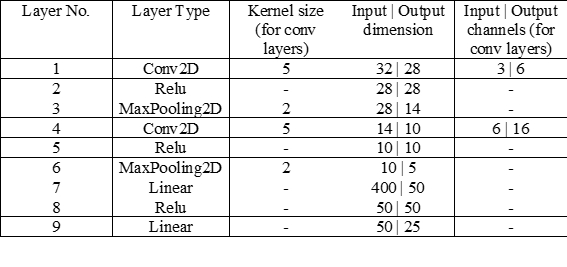

The students must:

1. Become familiar with the *BaseNet* architecture described above, the meaning of the different hyperparameters and the purpose of each layer. Create the code for the *BaseNet* model employing the fastai library, and using any of the techniques shown in the help guide.
2. Train the model and compute the values of “accuracy” and loss function for both training and test sets. Present the results using the provided functions.

## Obtención del conjunto de datos: Código del profesor

In [ ]:
# We get the CIFAR100 dataset
path = untar_data(URLs.CIFAR_100,force_download=True)

In [ ]:
# The CIFAR_100 dataset, as well as the MNIST dataset, follows a common layout for machine learning datasets: 
# separate folders for the training set and the validation set (and/or test set). 
# Let's see what's inside both the training and test sets
print(path)
print(path.ls())
print((path/'train').ls())
print((path/'test').ls())
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))

/root/.fastai/data/cifar100
[Path('/root/.fastai/data/cifar100/train'), Path('/root/.fastai/data/cifar100/test')]
[Path('/root/.fastai/data/cifar100/train/people'), Path('/root/.fastai/data/cifar100/train/large_carnivores'), Path('/root/.fastai/data/cifar100/train/fish'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things'), Path('/root/.fastai/data/cifar100/train/small_mammals'), Path('/root/.fastai/data/cifar100/train/reptiles'), Path('/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores'), Path('/root/.fastai/data/cifar100/train/flowers'), Path('/root/.fastai/data/cifar100/train/vehicles_2'), Path('/root/.fastai/data/cifar100/train/non-insect_invertebrates'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals'), Path('/root/.fastai/data/cifar100/train/trees'), Path('/root/.fastai/data/cifar100/train/vehicles_1'), Path('/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes'), Path('

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. **The 100 classes in the CIFAR-100 are grouped into 20 superclasses**. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  50000
Total test images:  10000


We now keep the first 25 classes. To do so, we remove the last 75 from the dataset.

In [ ]:
#https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder
import shutil
number_of_classes_to_keep = 25
number_of_superclasses_to_keep = int(number_of_classes_to_keep/5)
print('SUPERCLASSES DELETED:')
for i in range(number_of_superclasses_to_keep,len(train_classes)):
  print(train_classes[i])
  shutil.rmtree(train_classes[i]) 
print('SUPERCLASSES KEPT:')
for i in range(number_of_superclasses_to_keep):
  print(train_classes[i])

SUPERCLASSES DELETED:
/root/.fastai/data/cifar100/train/small_mammals
/root/.fastai/data/cifar100/train/reptiles
/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/train/flowers
/root/.fastai/data/cifar100/train/vehicles_2
/root/.fastai/data/cifar100/train/non-insect_invertebrates
/root/.fastai/data/cifar100/train/aquatic_mammals
/root/.fastai/data/cifar100/train/trees
/root/.fastai/data/cifar100/train/vehicles_1
/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/train/household_furniture
/root/.fastai/data/cifar100/train/fruit_and_vegetables
/root/.fastai/data/cifar100/train/insects
/root/.fastai/data/cifar100/train/food_containers
/root/.fastai/data/cifar100/train/household_electrical_devices
SUPERCLASSES KEPT:
/root/.fastai/data/cifar100/train/people
/root/.fastai/data/cifar100/train/large_carnivores
/root/.fastai/data/cifar100/train/fish
/root/.fastai/data/cifar100/train/medium_mammals
/root/.fastai/d

In [ ]:
# We also remove the same superclasses from the test set
for i in range(number_of_superclasses_to_keep,len(test_classes)):
  print(test_classes[i])
  shutil.rmtree(test_classes[i]) 

/root/.fastai/data/cifar100/test/small_mammals
/root/.fastai/data/cifar100/test/reptiles
/root/.fastai/data/cifar100/test/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/test/flowers
/root/.fastai/data/cifar100/test/vehicles_2
/root/.fastai/data/cifar100/test/non-insect_invertebrates
/root/.fastai/data/cifar100/test/aquatic_mammals
/root/.fastai/data/cifar100/test/trees
/root/.fastai/data/cifar100/test/vehicles_1
/root/.fastai/data/cifar100/test/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/test/household_furniture
/root/.fastai/data/cifar100/test/fruit_and_vegetables
/root/.fastai/data/cifar100/test/insects
/root/.fastai/data/cifar100/test/food_containers
/root/.fastai/data/cifar100/test/household_electrical_devices


Now we verify if we have removed them correctly. 

In [ ]:
print(path)
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))
print(len(test_classes))

/root/.fastai/data/cifar100
5
5


And that the number of examples is correct

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  12500
Total test images:  2500


Now we should have 12500 images for training and 2500 images for testing. 

## Código de Dataloaders

### Introducción a los dataloaders 

Los DataLoaders son el corazón de varios modelos de aprendizaje profundo ya que necesitan de muchos datos para aprender. La manera como leemos y transformamos el conjunto de datos de entrada puede afectar fuertemente el resultado final de nuestro modelo. 

Los [DataLoaders](https://docs.fast.ai/data.core.html) de fastAi, inspirados de los [DataLoaders](https://pytorch.org/docs/stable/data.html) de pytorch, nos permite cargar de forma eficiente y rápida diversos conjuntos de datos usados normalmente y/o cualquiera que tengamos en nuestro dispositivo. 

Además, nos permite realizar transformaciones de forma muy sencilla al conjunto de datos, desde división efectiva en conjunto de entreno y conjunto de validación hasta normalizado y augmentación de datos. Los datos se cargan directamente en la gpu, por defecto, para ser tratados por el modelo sin perder tiempo de transferencia. 

En nuestro caso usaremos un DataLoader normal, sin transformaciones de momento. 

### Implementación del DataLoader

In [ ]:
print(train_classes)

[Path('/root/.fastai/data/cifar100/train/people'), Path('/root/.fastai/data/cifar100/train/large_carnivores'), Path('/root/.fastai/data/cifar100/train/fish'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things')]


Si nos fijamos en el código anterior y leemos sobre el conjunto de datos a utilizar con la librería FastAi vemos que los datos están organizados en carpetas, lo habitual, y que no posee un archivo para sus respectivas etiquetas ya que estas son el nombre de la carpeta donde se encuentra la imagen. 

Esto nos indica que tendremos que utilizar algún tipo de función para leer el directorio de la imagen a clasificar y filtrar el nombre de la carpeta padre. Sin embargo, en FastAi ya tienen una función que lo hará por nosotros, se llama [get_parent_label](https://docs.fast.ai/data.transforms.html)

Next, we should employ DataLoaders and DataBlock to load the data. 

Para especificar un [DataBlock](https://docs.fast.ai/data.block.html) los argumentos necesarios serán, además de la función mencionada anteriormente, asignar el tipo de bloque (¿Qué son las entradas y qué son las salidas?), de dónde sacamos los datos de entrada( [get_image_files](https://docs.fast.ai/tutorial.vision.html) nos permite obtener los datos de una carpeta en concreto, si no se especifica ninguna se busca en el path de FastAi por carpetas con nombres especificos como train, test, valid...), una forma de dividir los datos de entrada si fuera necesario (Los Splitter nos ayudarán a realizar la validación cruzada y poder comparar el rendimiento entre diversos modelos), y por último (en nuestro caso) la función que determina la etiqueta.  

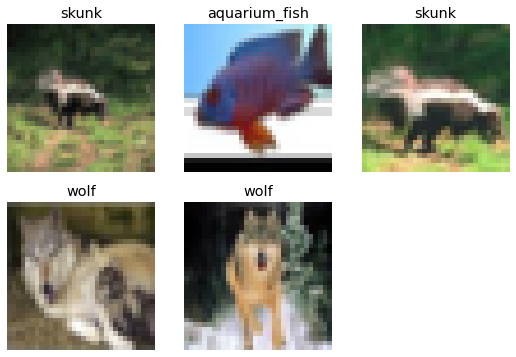

In [ ]:
#Code to be done by the students. 
dls = DataBlock(
  blocks=(ImageBlock,CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.1,seed=42),
  get_y = parent_label,
)

dls = dls.dataloaders(path/'train') 
dls.show_batch(max_n=5) 

Como vemos, parecemos haber cargado correctamente las imágenes y sus etiquetas en nuestro bloque de datos. Ahora podemos proceder a codificar la arquitectura mencionada en el enunciado.

## Implementación del modelo 

### Introducción a FastAi Sequential

Para implementar un modelo hay diversas formas. En este caso, como tenemos una arquitectura sencilla y secuencial, sin complicaciones extras, podemos auxiliarnos de la clase "sequential" de FastAi y sus diversas [capas](https://docs.fast.ai/layers.html). 

Para implementar la arquitectura simplesmente nos hará faltar leer sobre las directivas "Conv2d","ReLu", "MaxPool", "Linear" y el paso previo a pasar a esta última "Flatten" (Codificar la matriz como un vector plano).

Para saber especificar los parámetros necesarios sobre las capas de entrada en nuestro caso tendremos que tener en cuenta un par de cosas.
1. La primera convolución tendrá como número de canales de entrada o 1 ó 3, dependiendo de si la imagen es de color o en escala de grises. 
2. Las siguientes capas convolucionales tendrán de entrada lo equivalente al número de características extraídas por las capas anteriores (out_channels de las capas anteriores). 
3. Cuando lleguemos a las capas "Fully Connected" necesitamos aplanar la matriz. De tal forma que el número de canales de entrada será equivalente a: $W\cdot H \cdot C$ Donde H se refiere a la altura de la matriz, W al ancho y C el número de canales.
  - Como consecuencia, para saber el tamaño de la matriz al llegar a la capa totalmente conectada debemos aplicar la siguientes fórmula: $(W-F+2P)/S + 1$ para la altura, y análogamente para el ancho. (F es el tamaño del filtro, P es si lleva "padding" o bordes añadidos, y S es el "stride" o paso). 

Si aplicamos las fórmulas anteriores podemos entender porque la arquitectura pone que la capa totalmente conectada tiene 400 entradas. (La matriz que le llega es 5x5 y hay un total de 16 canales). 

### Implementación del modelo base_net

In [ ]:
base_net = sequential(
  nn.Conv2d(3,6,kernel_size=5,stride=1,padding=0), # 32 - 5 = 27/ 1 + 1 = 28 out_dimension
  nn.ReLU(),
  nn.MaxPool2d(2), # 28 / 2 = 14
  nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0), # (14 -5)/1 +1 = 10 
  nn.ReLU(),
  nn.MaxPool2d(2), # 10 / 2 = 5 
  Flatten(),
  nn.Linear(400,50,bias=True),
  nn.ReLU(),
  nn.Linear(50,25,bias=True),
)

Aunque compile el código anterior, no sabremos si nos hemos equivocado hasta que probemos multiplicar cosas con los tensores especificados. 

Si quisieramos saber el número de parámetros que hemos utilizado para la arquitectura anterior podríamos realizar el cálculo de forma manual, tal que por ejemplo el número de parámetros en la primera convolución es $ In_c \cdot 5 \cdot 5 + 1) \cdot 6$ Donde $In_c$ se refiere al número de canales de entrada y luego sumar lo obtenido para todas las capas convolucionales (ReLU y MaxPool no tienen parámetros entrenables) más las entradas de la capa lineal (En esta capa el resultado es (current_layer_neurons * previous_layer_neurons)  + 1*current_layer_neurons) ). [Understading CNNs parameters](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)

Sin embargo, FastAi nos puede ayudar con tal solo llamar a la siguiente función: 

In [ ]:
total_params(base_net) 

(24197, True)

Además, nos permite verificar nuestro modelo con tan solo llamarlo

In [ ]:
base_net

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): fastai.layers.Flatten(full=False)
  (7): Linear(in_features=400, out_features=50, bias=True)
  (8): ReLU()
  (9): Linear(in_features=50, out_features=25, bias=True)
)

In [ ]:
base_net[0].weight.shape

torch.Size([6, 3, 5, 5])

## Métricas y resultados entrenamiento: 

Una vez establecido nuestro modelo y datos de entrenamiento, estamos a un paso de tener una red convolucional capaz de clasificar nuestro conjunto de datos. Solamente necesitamos elegir una métrica de rendimiento y crear nuestro "aprendiz" ([Learner](https://docs.fast.ai/learner.html)). 

Las métricas que utilizaré son las básicas para los problemas de clasificación: "Accuracy" y "[F1(Macro)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)". La primera nos indicará cuánto de bien clasificamos los datos, y la otra nos permitirá medir la validez de los resultados en términos de precisión versus memorizar. 


[Otras métricas](https://docs.fast.ai/metrics.html) -- [Artículo sobre AUC-ROC](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)

In [ ]:
import pandas as pd
from fastai.vision.all import *

f1_macro = F1Score(average='macro')
f1_macro.name = 'F1(macro)'

Una vez definida nuestras métricas solamente tenemos que crear el aprendiz, cuyos parámetros son: 

In [ ]:
doc(Learner)

[All about learner in fastai](https://docs.fast.ai/learner.html#recorder)

In [ ]:
learn = Learner(dls, base_net, metrics=[accuracy,f1_macro])
learn.summary()

Sequential (Input shape: 64 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 6 x 28 x 28    
Conv2d                                    456        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 6 x 14 x 14    
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 10 x 10   
Conv2d                                    2416       True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 5 x 5     
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 400    

Vemos con el summary() todos los detalles que nos podría hacer falta para entender nuestro modelo. Desde sus distintas capas, números de parámetros hasta  su función de pérdida (Nuestro modelo estará usando Entropía cruzada). 

Gracias a ese "wrapper" de nuestro modelo y el conjunto de datos, entrenarlo es super sencillo, solo tenemos que llamar al método "fit()". Sin embargo, vamos a utilizar el método "fit_one_cycle()". La razón por la cual usaremos el último es dado al análisis de [Leslie N.](https://arxiv.org/pdf/1708.07120.pdf) en la super rápida convergencia de modelos neuronales utilizando "learning_rates" altos, que sirven hasta para regularizar el entreno. Es por ello que antes de entrenar debemos buscar el máximo "learning_rate" que vamos a utilizar con el método "lr_find()". En este [artículo](https://www.novetta.com/2021/03/learning-rate/) se explica bastante bien la gráfica resultante.

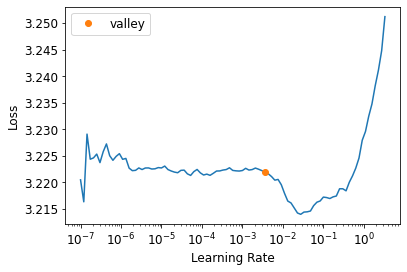

In [ ]:
lr = learn.lr_find()

(Sacado del artículo anterior) "...At the end of each batch, the learning rate dynamically increases until the loss begins to increase at an exponential rate (as seen in the graph below). After plotting the loss and learning rate, the optimal learning rate can be found in the value that is approximately a power of ten less than the inflection point, or in the value of the steepest slope. ..."  El punto de inflección en nuestro caso se ve a la derecha del punto obtenido en naranja.

Una vez obtenido el learning rate anterior, podemos llamar el método de Leslie y así observar el rendimiento de nuestro modelo. Como no estamos utilizando ninguna capa de regularización, ni tampoco estamos utilizando "early_stopping", para evitar sobre-entrenamiento impondré un máximo de 6 épocas para evitar que nuestro modelo pueda memorizar el conjunto y aprender del ruido, perdiendo capacidad de generalizar.

In [ ]:
learn.fit_one_cycle(n_epoch=6,lr_max=lr[0])

epoch,train_loss,valid_loss,accuracy,F1(macro),time
0,2.914111,2.745668,0.176000,0.136470,00:18
1,2.512440,2.453844,0.253600,0.236545,00:13
2,2.272416,2.338464,0.303200,0.276047,00:12
3,2.083094,2.141868,0.348000,0.333211,00:14
4,2.001471,2.121561,0.355200,0.350331,00:12
5,1.906315,2.068007,0.384000,0.372069,00:13


Vemos que nuestro modelo parece ir por un buen camino, ya que la pérdida en el conjunto de validación baja y nuestra métrica F1 sube suponiendo una mejora en la precisión (balanceado con respecto al recall). Pero nuestro accuracy sigue siendo bastante bajo. Podemos mirar un par de ejemplos clasificados con la siguiente llamada: 

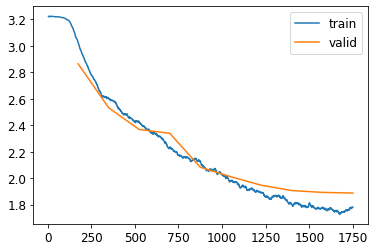

In [ ]:
learn.recorder.plot_loss()

Sin embargo, si miramos la gráfica arriba vemos que estamos empezando a sobre-entrenar ya que nuestro error de validación empezaba a estancar-se y era posible que, si siguieramos entrenando, que nuestro error subiera. Eso significaria que estaríamos "memorizando"/aprendiendo del ruido en nuestros datos de entreno y perdiendo generalización.

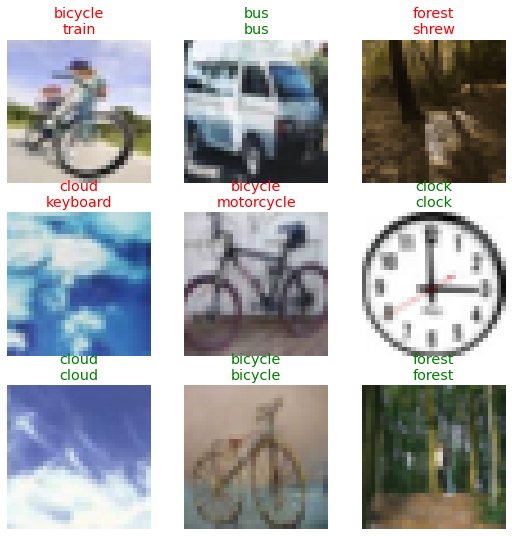

In [ ]:
learn.show_results()

Vemos que tenemos un par de aciertos, pero todavía le cuesta a nuestro simple modelo distinguir entre algunas imágenes; As veces está cerca de la etiqueta y otras es como si elegiera algo al azar.

Además, aparentemente nuestro modelo iba por un "buen camino" reduciendo ambas pérdidas. El momento que seguía se ve reflejado: 

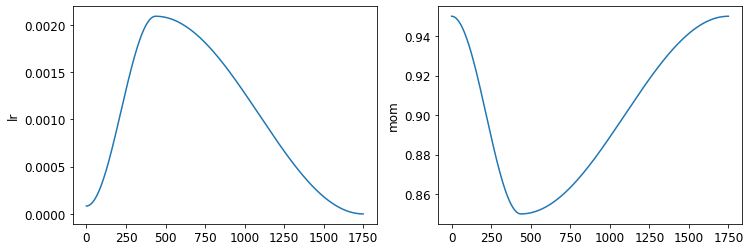

In [ ]:
learn.recorder.plot_sched()

Vemos que el "warmup" no es lineal como en el Paper de Leslie, esto es porque FastAi lo combina con "cosine annealing" para obtener la forma no-lineal que se ve arriba. [Capítulo Libro sobre Convoluciones con FastAi](https://colab.research.google.com/github/fastai/fastbook/blob/master/13_convolutions.ipynb#scrollTo=-fbrzYJPxwHH)

Para validar correctamente el comportamiento de nuestro modelo podemos utilizar la clase [Interpretation](https://docs.fast.ai/interpret.html) y [ClassificationInterpretation](https://docs.fast.ai/interpret.html) (Ya que estamos en un problema de clasificación) y ver dónde más se equivoca nuestro modelo, y la matriz confusa (No tenemos que clasificar tantas clases, se podrá ver bien)

In [ ]:
doc(Interpretation)
doc(Interpretation.from_learner)

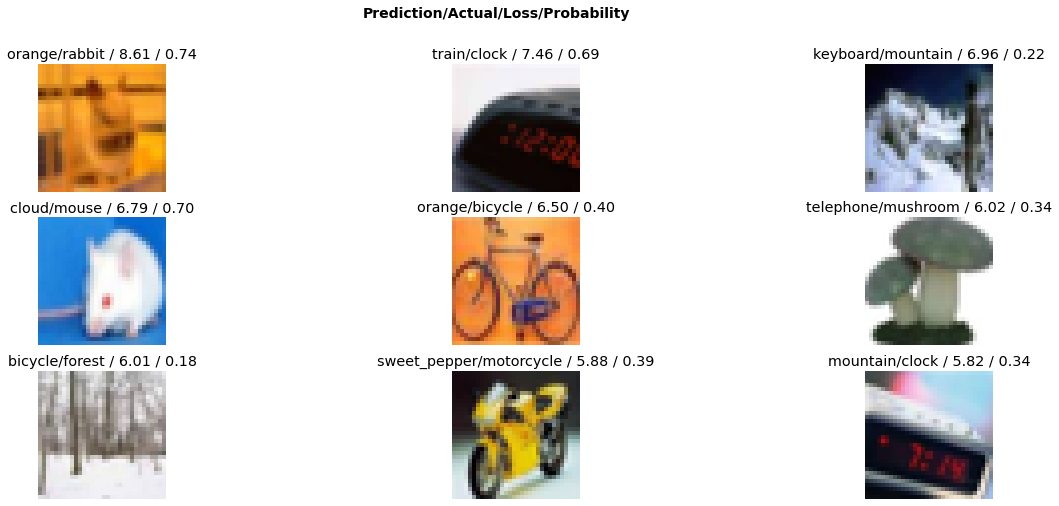

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(21,8))

Los valores que salen arriba de las imágenes corresponden a "predicción" versus "etiqueta real" con su pérdida asociada y la "confianza" de nuestro modelo en esta etiqueta.  Entonces podemos tener una pérdida por error, o por ser predicción correcta con confianza baja. [Lesson 2 - Practical Deep Learning](https://www.youtube.com/watch?v=F4tvM4Vb3A0&list=PLfYUBJiXbdtSvpQjSnJJ_PmDQB_VyT5iU&index=2) 

En nuestro caso nuestro modelo apenas se equivoca, en ningún momento es por acertar con confianza baja. Es es probablemente porque aún no llegó a entender las características esenciales de cada clase. 

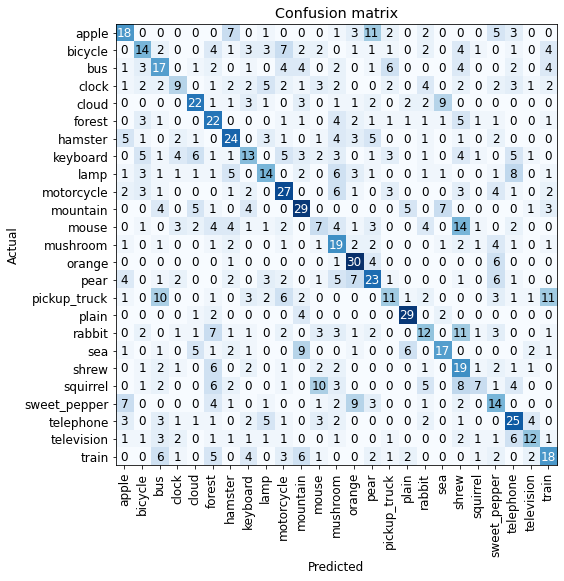

In [ ]:
clas_interp = ClassificationInterpretation.from_learner(learn)
clas_interp.plot_confusion_matrix(figsize=(21,8))

Vemos que nuestro modelo todavía no es capaz de predecir bien las etiquetas ya que la diagonal no se ve realmente destacada en relación a las demás clases. Se nota que parecer haber aprendido sobre "rocket" y "tank". 

Ahora, para entender como usar el conjunto de test usando nuestro dls, tenemos el siguiente código: 

## Código del profesor sobre conjunto de Test

Now, we want to check the performance of our trained model in testing

In [ ]:
doc(learn.dls.test_dl)
# We create the test dataloader
test_dl = learn.dls.test_dl(files_test, with_labels=True)

In [ ]:
# We can check that we have indeed 2500 test examples
test_dl.show

<bound method Datasets.show of (#2500) [(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13)),(PILImage mode=RGB size=32x32, TensorCategory(13))...]>

In [ ]:
doc(learn.get_preds)
# We perform prediction on this bunch of data
preds, targs = learn.get_preds(dl=test_dl)

In [ ]:
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  35.8 %




---



---



---



# **Exercise 2:** **Improvement of the BaseNet model (3 points)**
Now the goal is to create, by making judicious architectural and implementation choices, an enhanced deep network based on *BaseNet*. A good combination of layers can make the accuracy of the new model close to 50% on our CIFAR100 data. To enhance your network, you may consider adding any combination of the following enhancement options:
1. **Data normalization**. Scale normalization of the input data, in general, makes training easier and more robust. Use the DataLoader or ImageDataLoaders class with the correct parameters so that the data is well conditioned (mean=0, stddev=1) to improve training. You must ensure that test_transform uses the same normalization parameters as train_transform.
2. **Batch normalization**. Batch-normalization layers in most cases help to reduce overfitting and improve model training. Add normalization layers after convolutional layers and before the ReLU layer, but try including it after ReLU layers as well.
3. **Depth increase**. Experiment adding convolutional layers. Do not always put a maxpool layer after each conv layer, as this leads to excessive loss of information by reducing the number of units. If needed use UpSampling (Transposed Convolution) layers to increase the number of units.
4. **Dropout**. This layer introduces regularization by randomly selecting a percentage of active neurons for each mini-batch. This helps the network to specialize neurons in specific and independent information.
5. **Early Stopping**. After how many epochs we should stop training? This answer on stack-exchange (https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set/18346#18346) is a good summary of using train-val-test splits to reduce overfitting. This blog (https://elitedatascience.com/overfitting-in-machine-learning#how-to-prevent) is also a good reference for “early stopping”. Very important: keep in mind that you should never use the test set for anything other than the final evaluation. You should decide for how many epochs you will train your model by looking at the training loss and validation accuracy plots (to do so, evaluate the local minima/maxima of the loss function as well as the classification accuracy). Remember that if you choose too many epochs it would quite likely lead to overfitting, while if you select too few your model quite likely won't  learn enough. In your report, you must include a table similar to the one shown in Exercise 1 to illustrate the architecture of your final improved network. In addition, you must explain the steps taken with the partial results obtained that have finally led you to introduce the proposed modifications.
6. **Data augmentation**.  Use the DataLoader or ImageDataLoaders class data zoom parameters, like zoom_range and/or horizontal_flip. Remember that you should not have any data augmentation in the validation or test sets. If you need a better understanding, try reading Fastai's tutorial on transformations. Look at data augmentation using image transformations.

---



---



---

## Mejora sobre el conjunto de datos de entrenamiento 

### Ideas sobre como mejorar el conjunto de entreno 

Primeramente lo que haremos será mejorar nuestro conjunto de datos de entrada. Como vamos a aumentar la profundidad y complejidad de nuestro modelo, conviene utilizar métodos de regularización a traves de [transformaciones](https://docs.fast.ai/vision.augment.html) sobre las imágenes de entrada (Ojo, no transformaremos el conjunto de validación ni el de test, este último ni se toca) y [normalizar](https://docs.fast.ai/data.transforms.html) la entrada para favorecer la convergencia, disminuyendo oscilaciones del gradiente ya que hacemos que la entrada tenga distribución similar en todos los casos.

Para la normalización fastai nos permite utilizar las mismas estatísticas que se utilizaron para diversas bases de datos, en nuestro caso incluso disponemos de las estadísticas de "cifar" que es la que utilizaré. Las transformaciones que utilizaré serán simplemente un invertido horizontal y/o Zoom con probabilidades igual a 0.5. 

En este caso no es necesario, pero por buena programación utilizaré item_tfms para establecer un tamaño común para todas las imaǵenes de nuestro conjunto a un mínimo (32, con el método "squish" que lo que hace es mantener toda la información en la imágen al contrario del "crop", con el primero perdemos el "aspect-ratio" y con el segundo información en general) 

In [ ]:
doc(Flip())
doc(Zoom())

### Implementacion nuevo conjunto de entreno 

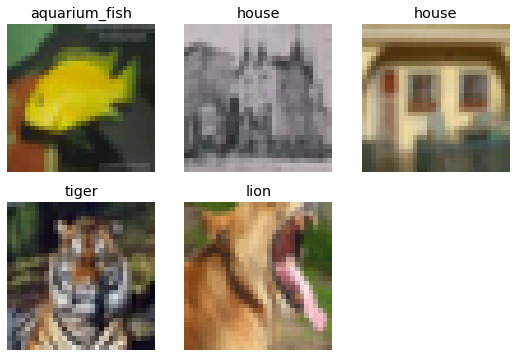

In [ ]:
ndls = DataBlock(
  blocks=(ImageBlock,CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.1,seed=140421),
  get_y = parent_label,
  item_tfms=[Resize(32,method='squish')],
  batch_tfms=[Normalize.from_stats(*cifar_stats),Flip(),Zoom()]
)

ndls = ndls.dataloaders(path/'train') 
ndls.show_batch(max_n=5) 

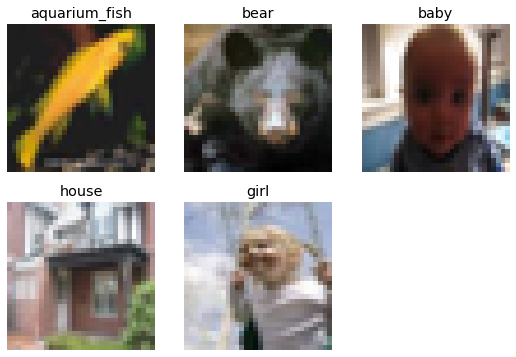

In [ ]:
ndls.valid.show_batch(max_n=5)

No podemos saber si se ha aplicado alguna transformación al conjunto de validación aunque mostre las imágenes de arriba ya que no conocemos el conjunto. Sin embargo, en la documentación de FastAi se impone que las transformaciones son sobre el conjunto de entrenamiento (Lo correcto). Y además, la primera vez que resolví este ejercicio estaba haciendo "aug_transforms" (augmentación de datos) incluso con invertido vertical y en el conjunto de validación no se veía ningún tipo de deformación y en el conjunto de entreno había varias. 

La razón por la que luego quité "aug_transforms" fue por el siguiente artículo sobre [Optimal CNN development](https://medium.com/swlh/optimal-cnn-development-use-data-augmentation-not-explicit-regularization-dropout-weight-decay-c46fb6b41c02) donde recordé aspectos de la regularización en sí y sobre la augmentación de datos. En ese artículo me dí cuenta que para un modelo tan sencillo usar "aug_transforms" con tantas transformaciones regularizaría demasiado, aumentando el sesgo y evitando que nuestro modelo aprenda todo lo posible (sin overfitting). 

## Explicación de las mejoras usadas sobre el modelo base_net 

Para el modelo mejorado, he tenido en cuenta lo estudiado en teoría sobre el intento de VGG ([VGG architecture paper](https://arxiv.org/pdf/1409.1556v6.pdf)) de establecer un principio de diseño para redes convolucionales y lo tomé como inspiración. 

En nuestro caso además, como el conjunto de imágenes de entrada es pequeño (32x32) estuve leyendo sobre las [Transpose Convolution pytorch](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html) para aumentar el tamaño de la matriz de características tomando información a diferentes escalas (dilation=2). 

También tomé inspiración en el modelo [inception](https://cloud.google.com/tpu/docs/inception-v3-advanced?hl=es-419) para aumentar la cardinalidad de mis capas utilizando los [grupos de pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html). Según esta publicación el aumento de cardinalidad influyó en el aumentó del rendimiento [Enhancing Resnet](https://medium.com/dataseries/enhancing-resnet-to-resnext-for-image-classification-3449f62a774c). (Además, el aumento de la cardinalidad disminuye el tiempo de cómputo necesario ya es que un proceso más paralelizable). Usó también la idea de "bottleneck layers" o módulos de adelgazamiento de tensores para reducir el número de operaciones en una capa. 

De las inspiraciones anteriores está también la razón por la cuál utilizé 
[BatchNormalization pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) y [Dropout pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html). Pero además, La primera forma de regularización nos ayuda a converger antes evitando el oscilamiento del gradiente conforme nos indica la [explicación de la normalización del batch](https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739), ya que la magnitud del gradiente en cada batch es más uniforme. (Cada vez que lo usamos añadimos 2 parámetros entrenables). La segunda forma de regularización nos ayuda a simular un "ensemble" o conjunto de modelos en uno según las desactivaciones utilizadas, forzando la eliminación de "neuronas vagas" y la co-adaptación de las neuronas para "arreglar" el error de las otras neuronas, aumentando la "sparsity" de las activaciones ("especialización" de las neuronas) y disminuyendo la variación en el conjunto de test. En media se obtiene una mejora del 2% en modelos a los cuales se le añade Dropout. [Dropout: A simple way](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf).

No nos tenemos que preocupar por la inicialización de los pesos ya que FastAI ya utiliza una incialización adecuada para nuestra función de activación, la de [kaiming normal](https://towardsdatascience.com/understand-kaiming-initialization-and-implementation-detail-in-pytorch-f7aa967e9138). Y utiliza un muy buen optimizador, el de [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) que favorece la rápida convergencia al mezclando AdaGrad con RMSProp. ("..Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages..." 

Por último, leí sobre [funciones de activaciones](https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5) y me encontré con una publicación sobre una "posible sucesora de ReLU", denominada [Mish](https://lessw.medium.com/meet-mish-new-state-of-the-art-ai-activation-function-the-successor-to-relu-846a6d93471f) con una mejora aproximada del 1.5% con respecto a ReLU. (Mirando sobre le conjunto de validación obtuve una mejora del 2.3% por lo que ese fue mi modelo final -- Ayuda con el problema del gradiente a cero para valores negativos "\[...\]Being unbounded above (i.e. positive values can go to any height) avoids saturation due to capping. The slight allowance for negative values in theory allows for better gradient flow vs a hard zero bound as in ReLU. \[...\]").

Luego, recordé que en clase fuera mencionado el uso de una versión adaptada de CrossEntropy que tenía en cuenta las clases erróneamente clasificadas con mayor peso que aquellas consideradas "fáciles" por nuestra red. Es por ello que decidí investigar y utilizar [FocalLoss](https://towardsdatascience.com/focal-loss-a-better-alternative-for-cross-entropy-1d073d92d075) para ver como se comportaría el modelo. Esa función de pérdida se resume en lo siguiente: "...Down weighting is a technique that reduces the influence of easy examples on the loss function, resulting in more attention being paid to hard examples. This technique can be implemented by adding a modulating factor to the Cross-Entropy loss...$\gamma$ is the focusing parameter to be tuned..."

Y aunque tanto Adam, como CrossEntropyFlat, producieron muy buenos resultados, quizé probar otros funciones y optimizadores. Opté por probar implementar una mejora del optimizador Adam. La mejora se denomina [AdamW + Amsgrad](https://www.fast.ai/posts/2018-07-02-adam-weight-decay.html) que consiste en añadir una regularización L2 al optimizador Adam + Amsgrad que consiste en una solución al hecho de que Adam pueda quedarse en valores sub-óptimos (Aunque el artículo anterior demuestra no haber verificado mejoras sustanciales, y en mi caso pasa algo similar; Incluso diría que entre ambos el que antes llegaba a converger era RAdam, que elimina la fase de "warmup" de Adam.). Como RAdam me produjó resultados muy similares a AdamW+Amsgrad, procuré información sobre RAdam en caso de que tuviera algo similar al Amsgrad de Adam. Ahí fue cuando me deparé con [Ranger](https://lessw.medium.com/new-deep-learning-optimizer-ranger-synergistic-combination-of-radam-lookahead-for-the-best-of-2dc83f79a48d). 

Ranger consiste en una mezcla de RAdam, que elimina la fase de "warmup" de Adam", que utiliza un rectificador para ajustar el momento de Adam basandose en la varianza con LookAhead que es fruto de los avances en el entendimiento de las superficies de las funciones de pérdidas de las redes profundas. LookAhead básicamente posee 2 pesos y interpola entre ellos. La frase que más me gustó de la publicación fue: 

"...To explore by yourself would be hard because you’d have to drop down each one, and assuming it was a dead end, find your way back out.

But, if you had a buddy who would stay at or near the top and help pull you back up if things didn’t look good, you’d probably make a lot more progress... "


Otros artículos leídos cuyos cambios a este modelo no se aplicaron: 

[DataAugmentation with fastai](https://towardsdatascience.com/data-augmentations-in-fastai-84979bbcefaa)

[Why using mixup improves generalization](https://arxiv.org/abs/1710.09412)

Además, en el anexo se deja un par de modelos y todas las demaś implementaciones de las funciones de pérdidas y optimizadores utilizado (destaca el uso de AdamW+Amsgrad que se puede hacer fácilmente gracias al OptimWrapper de FastAi para optimizadores Torch) que he probado sobre el conjunto de validación antes de converger a este, ya que todavía no había terminado de leer los diversos artículos con los que me encontré. Con los modelos del anexo sufrí con diversos problemas, sobre todo diría que con el problema de "vanishing gradient" al haber hecho la red demasiado compleja/profunda sin tener en cuenta conexiones residuales para ayudar a ese problema.

## Implementación del nuevo modelo mejorado

Una vez introducido los conceptos, la idea es simples: añadimos BatchNorm después de cada operación convolucional o lineal, para pasar de una capa a otra usamos la función de activación Mish y hacemos en total 3 MaxPool. Para poder hacer 3 MaxPool sin perder tanta información hacemos dos convoluciones transpuestas con kernel_size = 5, dilation = 2 para añadir 8 al tamaño de nuestra imágen así en la última capa, pasado el último MaxPool, tendremos una 7x7. En las últimas capas además añadimos una lineal e imponemos dos dropouts, uno más laxo en la primera y uno más estricto en la segunda.  

In [ ]:
improved_net = sequential(
  nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
  nn.ConvTranspose2d(8,16,kernel_size=5,padding=0,dilation=2), # 32 -> 40
  nn.BatchNorm2d(16,eps=1e-5,momentum=0.1, affine=True),
  nn.Mish(),
  nn.MaxPool2d(2),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1,groups=4),
  nn.ConvTranspose2d(32,64,kernel_size=5,padding=0,dilation=2), # 20 -> 28 
  nn.BatchNorm2d(64,eps=1e-5,momentum=0.1, affine=True),
  nn.Mish(),
  nn.MaxPool2d(2),
  nn.Conv2d(64,16,kernel_size=1),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1,groups=4),
  nn.BatchNorm2d(32,eps=1e-5,momentum=0.1, affine=True),
  nn.Mish(),
  nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1,groups=4),
  nn.BatchNorm2d(64,eps=1e-5,momentum=0.1, affine=True),
  nn.Mish(),
  nn.MaxPool2d(2),
  Flatten(),
  nn.BatchNorm1d(7*7*64),
  nn.Dropout(p=0.2,inplace=False),
  nn.Linear(7*7*64,64,bias=True),
  nn.Mish(),
  nn.BatchNorm1d(64),
  nn.Dropout(p=0.2,inplace=False),
  nn.Linear(64,25,bias=True),
)

Como vemos, nuestro modelo empieza a complicarse; Ya sería incluso oportuno empezar a plantearse el uso de la codificación de modelos en forma de clases (objetos). 

Si nos fijamos en el número de capas y parámetros veremos: 

In [ ]:
total_params(improved_net)

(271929, True)

Tenemos algo parecido a 10 veces más parámetros que el modelo anterior, lo que en principio debería suponer una posibilidad de mejorar relevante en consideración al modelo anterior. 

In [ ]:
learn = Learner(ndls, improved_net, metrics=[accuracy,f1_macro], 
                cbs=[MixUp(alpha=.1)],loss_func=FocalLossFlat(),
                opt_func=ranger)
# learn = Learner(ndls, improved_net, metrics=[accuracy,f1_macro])
learn.summary()

Sequential (Input shape: 64 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 8 x 32 x 32    
Conv2d                                    224        True      
____________________________________________________________________________
                     64 x 16 x 40 x 40   
ConvTranspose2d                           3216       True      
BatchNorm2d                               32         True      
Mish                                                           
____________________________________________________________________________
                     64 x 16 x 20 x 20   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 32 x 20 x 20   
Conv2d                                    1184       True      
____________________________________________________________________________
                     64 x 64 x 28

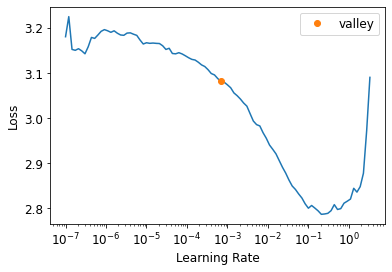

In [ ]:
lr = learn.lr_find()

Como hemos aumentado el nivel de complejidad de nuestro modelo, vamos a permitir que entrene durante más épocas. Además, queremos evitar que haya overfitting y aunque hayamos puesto capas que nos ayudan a regularizar nuestro modelo podemos utilizar algo más, el "early-stopping". Que nos ayuda a terminar el entrenamiento cuando nuestro error en el conjunto de validación crece durante un número de épocas equivalente al parámetro "patience" que en este caso lo dejaré a 2.

Early Stopping en FastAi se denomina como "CallBack", en FastAi hay diversos tipos de 
[Callback trackers](https://docs.fast.ai/callback.tracker.html) y además este artículo nos ayuda a entender porque deberíamos utilizarlos al entrenar nuestros modelos para obtener el mejor de los posibles modelos:  [Why use callbacks to save best models](https://lessw.medium.com/fastais-callbacks-for-better-cnn-training-meet-savemodelcallback-e55f254f1af5)

En este caso, gracias a la simpleza de FastAi, solamente tenemos que pasar un nuevo parámetro a la función de entrenamiento. Inicializamos nuestro "Learner" de la misma forma que en los ejercicios anteriores: 

In [ ]:
learn.fit_one_cycle(n_epoch=10,lr_max=lr[0],
                    cbs=EarlyStoppingCallback(monitor='valid_loss', patience=2))

epoch,train_loss,valid_loss,accuracy,F1(macro),time
0,2.269805,1.871892,0.336800,0.318491,00:22
1,1.809401,1.491529,0.421600,0.409631,00:22
2,1.597457,1.384443,0.441600,0.430224,00:23
3,1.436025,1.236499,0.485600,0.481469,00:22
4,1.298239,1.191348,0.498400,0.496896,00:22
5,1.180762,0.976510,0.561600,0.559754,00:22
6,1.090174,0.934741,0.574400,0.571517,00:22
7,1.000272,0.910596,0.587200,0.586428,00:22
8,0.948524,0.887463,0.612000,0.609874,00:22
9,0.883995,0.883389,0.608000,0.606506,00:22


Vemos que a priori, sobre el conjunto de entrenamiento hemos obtenido una mejora en F1(macro) de +20%. Además, cabe destacar el error en validación que ha decrecido aproximadamente 1 unidad. 

(Algo pequeño hincapie en la pequeña aleatoriedad que posee tanto la inicialización de los pesos como la estimación del lr con find_lr() que provocan pequeñas desviaciones en los resultados esperados, al haber ejecutado este modelo un par de veces he logrado estimaciones con una varación de unos +-5% estando la media en unos 55% para 10 épocas, mejor estimador: F1: 60.08% -> fue cuando se hizo la elección). 

### Resultados obtenidos del modelo mejorado

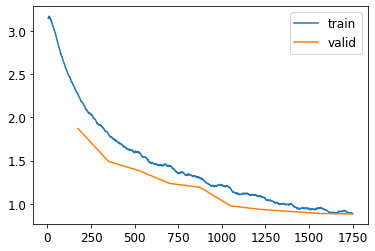

In [ ]:
learn.recorder.plot_loss() 

Vemos que seguimos mejorando el error en validación, hemos mejorado el accuracy y nuestro valor de F1 también ha aumentado. Todo indica que nuestro modelo parece haber aprendido algo e incluso mejorado con respecto al modelo anterior. Además, con la visualización de la gráfica anterior nos aseguramos que no tenemos overfitting ya que el error de validación no ha crecido (EarlyStopping nos habría parado en ese caso y podríamos decir lo mismo). 

Podemos utilizar los mismos métodos introducidos anteriormente para verificar los resultados: 

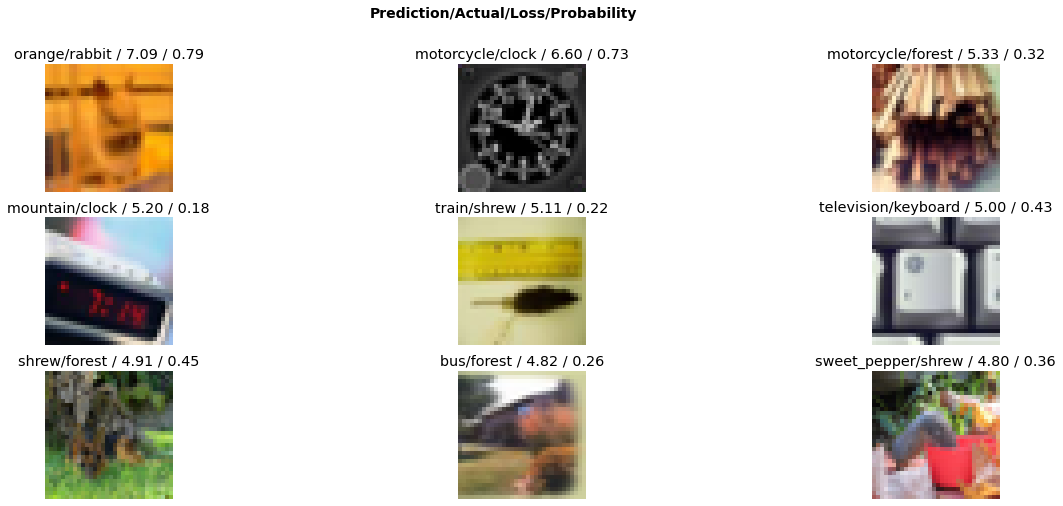

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(21,8))

Vemos que los peores errores son aquellos por predicciones erróneas como en el caso anterior. No hay ninguno por baja confianza en la predicción. 

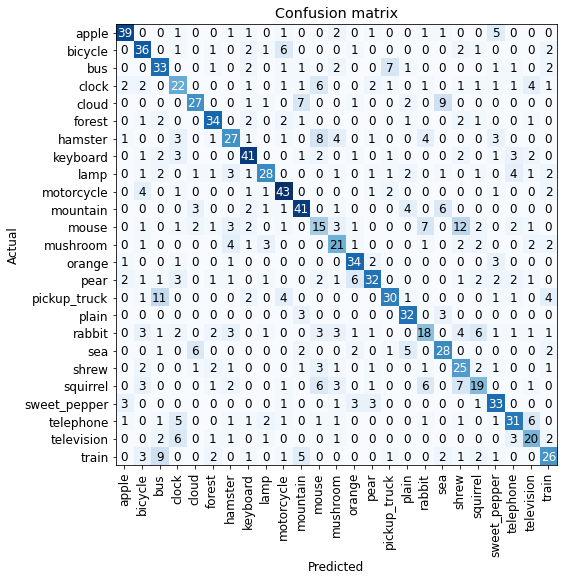

In [ ]:
clas_interp = ClassificationInterpretation.from_learner(learn)
clas_interp.plot_confusion_matrix(figsize=(21,8))

Podemos ver claramente la distinción entre ambos modelo al verificar la diferencia en el constraste (los valores que se obtienen) en la diagonal. Vemos que hemos podido clasificar correctamente mucho más objetos más veces, y además disminuye la variabilidad en la que nos equivocamos (Probablemente resultado de utilizar FocalLoss() ya que nos ayuda a centrarnos en aquellos objectos con los cuales más nos equivocamos.  

## Una vez determinado el modelo

Recuerdo que este apartado apenas se ejecutó cuando se determinó el modelo final haciendo uso de la validación cruzada.

Hacemos exactamente lo mismo que anteriormente para obtener el accuracy de nuestro modelo sobre el conjunto de test: 

In [ ]:
test_dl = learn.dls.test_dl(files_test, with_labels=True)
preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  62.44 %


Hemos mejorado casi dos veces más que el modelo anterior. 

# **Exercise  3: Model transfer and fine-tuning with ResNet18 for the Caltech-UCSD Birds-200-2011 database (3 points)**
In this exercise we will work with the Caltech-UCSD Birds-200-2011 dataset (https://www.vision.caltech.edu/datasets/cub_200_2011/). This dataset consists of 11,788 images of 200 bird species. It has 200 classes, with 5,994 for training and 5,794 for testing. Again, 10% of the training set will be left for validation. Read the dataset using the provided functions.

We will use the ResNet18 network model already pre-trained with ImageNet, it can be downloaded from the Fastai Model repository. You have to:
1. **Use ResNet18 as a feature extractor** for the Caltech-UCSD Birds-200-2011 dataset. To do this we will remove at least the head of the downloaded model, we will add some additional convolutional blocks and a new head. Specifically, students have to perform the following experiments:
    
    **1.1.** Download and adapt the ResNet18 model trained with ImageNet to the Caltech-UCSD dataset, retrain this new fully connected layer, and estimate the network performance. 
    
    **1.2.** Remove the head of the model and add new convolutional blocks and a new head designed by you. Retrain your model with Caltech-UCSD. 
    
    **1.3.** Compare the results obtained in 1.2 and 1.1.

  Remember that, during training, you have to freeze the weights in the feature extraction blocks.

2. **Make a fine-tuning of the entire ResNet18 network** for  Caltech-UCSD. Remember that the number of epochs for fine-tuning must be small.





## Código del Profesor para obtención de los datos

In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [ ]:
# We explore a little bit the folders and number of examples.
# train_test_split.txt contains the information about which images are for training and which ones are for testing
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)

/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/attributes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [ ]:
# images.txt contains the numbered list of all images. Combining the information in images.txt and train_test_split.txt we can 
# get the actual images for training and test. First, we read the images.txt file. 
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [ ]:
# We check if all classes are more or less equally well represented. 
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")

Number of examples per class
60 60 51 49 58 60 60 60 60 60 59 60 60 53 60 59 60 60 60 60 59 60 60 53 60 60 58 60 60 58 60 60 58 60 60 60 60 60 57 60 59 59 59 60 59 59 60 60 60 60 60 59 45 60 60 60 50 60 60 60 60 60 60 60 60 59 56 60 60 60 59 60 59 59 60 59 60 60 60 60 60 60 60 56 60 60 60 60 60 60 60 60 60 60 60 60 59 60 60 60 60 44 59 57 60 60 60 60 60 48 59 59 60 60 60 60 60 60 60 60 60 52 41 60 59 60 60 60 60 60 60 60 53 60 59 50 60 60 60 60 59 60 60 60 60 50 60 59 60 60 60 59 60 60 60 60 60 60 60 60 56 58 60 60 59 60 60 60 60 60 60 60 60 60 60 60 58 50 60 60 60 60 60 60 60 59 60 59 60 59 60 59 59 59 60 59 60 60 60 60 

In [ ]:
print(path)
import shutil, os
# If we already have these folders, we remove them because we want to create them from scratch
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

# We copy all images in two folders (train and test). Initially, both folders contain the same information.
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')

/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
# Now we remove from training those images belonging to test, and we remove
# from test those images belonging to train. 
import os 
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [ ]:
# We list the number of images in the folders to check if we actually have 5,994 images for training and 5,794 for testing
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  5994
Total test images:  5794


## Introducción a ResNet

[ResNet](https://arxiv.org/abs/1512.03385) supusó un gran avance en el mundo de las redes convolucionales al resolver el problema del "vanishing gradient" gracias al uso de "skip connections" donde la entrada de un bloque se añade al valor de salida de ese bloque, o incluso dos o tres más adelante, de tal forma que en la propagación hacia atrás el gradiente no se haga demasiado pequeño. 

La idea provino de analizar el rendimiento de redes profundas y ver que en términos de error en validación perdíamos calidad. Sin embargo, eso podría ser dado que al aumentar la profundidad estaríamos aumentando la complejidad de la función haciendo que quizás nuestro modelo no supiera generalizar dado que podría aprender del ruido. Pero en su análisis también visualizaron el error en el conjunto de entrenamiento y vieron que también crecia en relación a modelos más sencillos. 

La única explicación para ello era que el modelo no se estuviera optimizando correctamente, ya que mínimo tendría que tener el mismo rendimiento (Podemos coger el modelo más sencillo y añadirle capas que aprendan la función identidad y tendríamos exactamente el mismo modelo pero con más capas). 

Gracias a ResNet pudimos avanzar fuertemente en el mundo de las Redes Convolucionales y desde entonces salieron muchas más, muchas fueron variaciones de lo introducido por ellos. 

## Creación del DataBlock y Modelo 

De forma análoga a los ejercicios anteriores creamos el datablock con la única variación de que ahora normalizaremos el conjunto de datos de la misma forma que "imagenet", ya que el modelo fue entrenado con ese conjunto. Además, tenemos que asegurar que las imágenes de entrada tengan el mismo tamaño por lo que tendremos que hacer un resize con el method='squish' como definido en el ejercicio anterior. 

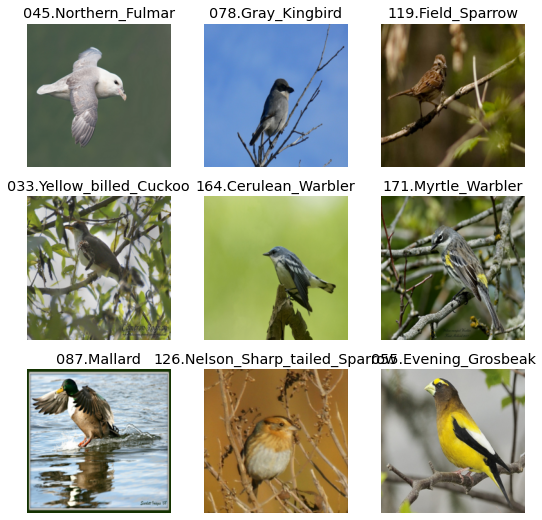

In [ ]:
CaltechUSCD = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224,method='squish')],
    batch_tfms =[Normalize.from_stats(*imagenet_stats)],
)

dls = CaltechUSCD.dataloaders(path)
dls.show_batch(max_n=9)

In [ ]:
def get_model(pretrained=True): 
  model = fastai.vision.models.resnet18(weights=ResNet18_Weights.DEFAULT)
  return model 

Al poner el parámetros pesos y elegir "default" estamos cargando el modelo entrenado con los pesos obtenidos en su momento al finalizar el entreno, con los cuales se publicaron los resultados en el artículo. Luego para crear el "learner" tenemos que establecer también que tampoco entrene los valores del batch\_normalization con "train\_bn=false"

In [ ]:
learn = vision_learner(dls,get_model,metrics=[accuracy,f1_macro],train_bn=False,custom_head=create_head(512,200,lin_ftrs=[]))
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                      

Vemos que hemos cargado correctamente nuestro modelo resnet18. Y ahora para poder realizar el "fine_tuning" del modelo tenemos que primeramente congelar las primeras etapas.

En clase hemos visto que usar redes entrenadas es una buena opción, ya que sabemos que cuando entrenamos una red neuronal con convolución, lo primero que hacemos es particionar las imágenes en pequeñas regiones para ir entrenando la red y , conforme avanzamos en la estructura de la red, estas pequeñas regiones se van combinando y formando regiones más grandes. Por lo tanto, las primeras regiones que introducimos en la red neuronal son regiones muy pequeñas y que, al fin y al cabo, se pueden encontrar en cualquier imagen. 

Las regiones más pequeñas son similares en todas las imágenes. Por lo tanto, podemos usar una red ya entrenada (con cualquier conjunto de imágenes) ya que, en su regiones más pequeñas, serán similares a las imágenes que nosotros vayamos a usar. Lo único que deberíamos hacer es fijar los pesos en las primeras capas de la red neuronal y reenrtrenarla con nuestras imágenes en las últimas capas, para adaptar y especializar la red a nuestro problema. 

Pero esto es un arma de doble filo. Supongamos que la red que queremos usar no se ha entrenado con un conjunto variado de imágenes, sino que se ha entrenado con imágenes que cumplen una determinada característica. Esto nos llevaría a tener una red demasiado especializada como para que de buenos resultados en otro campo que no sea ese. Por lo tanto debemos usar redes que hayan sido entrenada con imágenes variadas. 

### Resultados Entrenar últimas capas 

In [ ]:
learn.freeze()

Una vez congelada las primeras capas podemos entrenar el modelo como lo hicimos anteriormente: 

epoch,train_loss,valid_loss,accuracy,F1(macro),time
0,3.058840,1.828402,0.545185,0.521827,02:33
1,1.761401,1.186376,0.687739,0.675620,02:30
2,1.376979,1.117561,0.704709,0.690188,02:31


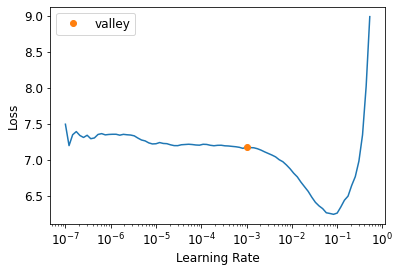

In [ ]:
lr = learn.lr_find() 
learn.fit_one_cycle(3,lr_max=lr[0])

Vemos que con casi 8 veces más etiquetas hemos logrado un accuracy casi 3 veces mejor que el modelo base_net (ejercicio 1). La alta complejidad de este modelo, el uso de módulos residuales y sus capas ya entrenadas anteriormente con tan solo 3 épocas, ó 10 minutos, obtiene resultados alucinantes. 

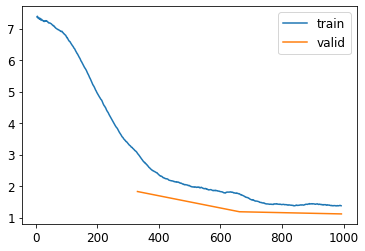

In [ ]:
learn.recorder.plot_loss() 

Vemos incluso, como mencionado en el primer ejercicio, que la gráfica nos indica que ibamos por un buen camino de aprendizaje, que incluso podríamos seguir entrenando las últimas capas un poco más para sacar hasta la última gota de rendimiento, solo tendríamos que poner EarlyStopping como en el ejercicio anterior. 

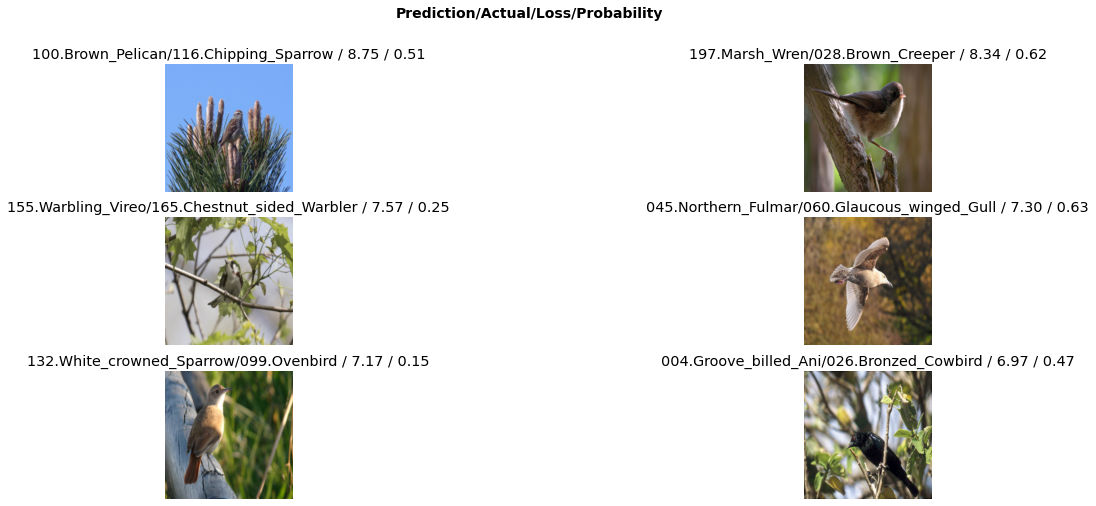

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(6,ncols=2, figsize=(21,8))

In [ ]:
clas_interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
doc(clas_interp.most_confused)

In [ ]:
clas_interp.most_confused()[:10]

[('014.Indigo_Bunting', '054.Blue_Grosbeak', 6),
 ('184.Louisiana_Waterthrush', '183.Northern_Waterthrush', 5),
 ('059.California_Gull', '066.Western_Gull', 4),
 ('145.Elegant_Tern', '143.Caspian_Tern', 4),
 ('011.Rusty_Blackbird', '009.Brewer_Blackbird', 3),
 ('037.Acadian_Flycatcher', '039.Least_Flycatcher', 3),
 ('039.Least_Flycatcher', '152.Blue_headed_Vireo', 3),
 ('059.California_Gull', '060.Glaucous_winged_Gull', 3),
 ('068.Ruby_throated_Hummingbird', '069.Rufous_Hummingbird', 3),
 ('105.Whip_poor_Will', '022.Chuck_will_Widow', 3)]

Vemos que las equivocaciones están repartidas uniformemente entre las diferentes clases, que no es especifico a un conjunto si no que hay variabilidad en algunos casos. 

El hecho de usar conexiones residuales para favorecer la propagación del gradiente realmente produce resultados. Nos permite generar redes muchos más profundas, del orden de hasta 300 veces más grandes que base_net sin pérdida de rendimiento, si no que al revés, ganamos bastante si elegimos bien la arquitectura, conjunto de datos y métodos de regularizado. 

## Añadimos capa y nueva cabeza

### Obtención del body 

Podemos verificar dónde tenemos una capa de pooling en nuestro modelo de la siguiente forma: 

In [ ]:
assert has_pool_type(resnet18(weights=ResNet18_Weights.DEFAULT))
pooling_layers = [has_pool_type(m_) for m_ in resnet18().children()]
pooling_layers

[False, False, False, True, False, False, False, False, True, False]

Gracias a la gran completitud de la librería FastAi, para obtener el modelo sin la cabeza podemos simplemente llamar a la función create_body() que nos devuelve todas las capas hasta la última activación (pooling). 

In [ ]:
body = create_body(resnet18(weights=ResNet18_Weights.DEFAULT),pretrained=True,n_in=3,)
pooling_layers = [has_pool_type(m_) for m_ in body.children()]
pooling_layers

[False, False, False, True, False, False, False, False]

Como vemos hemos obtenido un cuerpo con la última capa de pooling y sus sucesores eliminadas. Incluso podemos comprobar de la siguiente forma: 

In [ ]:
resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
body

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

O si es más claro podemos incluso crear el modelo y ver que el cuerpo no termina en una capa totalmente conectada ni tiene la salida completa: 

In [ ]:
learn = Learner(dls,body,metrics=accuracy, train_bn=False)
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

Vemos que no tenemos la capa Linear y ni siquiera MaxPool o algo del estilo al final de nuestro modelo. 

### Nueva Cabeza 

In [ ]:
# Make it all convolutional and add Leaky Relu + Softmax
custom_head = nn.Sequential(
  nn.AdaptiveAvgPool2d(output_size=(1,1)),
  nn.AdaptiveMaxPool2d(output_size=(1,1)),
  nn.Conv2d(512,128,kernel_size=1),
  nn.BatchNorm2d(128),
  nn.Conv2d(128,256,kernel_size=3,padding=1) ,
  nn.BatchNorm2d(256),
  nn.Conv2d(256,512,kernel_size=1),
  nn.BatchNorm2d(512),
  nn.Mish(),
  nn.Flatten(),
  nn.BatchNorm1d(512),
  nn.Dropout(0.2),
  nn.Linear(512,256),
  nn.Mish(),
  nn.BatchNorm1d(256),
  nn.Dropout(0.5),
  nn.Linear(256,200)
)

Una vez creada la nueva cabeza podemos añadirla al final del modelo como si ese fuera un vector de la siguiente forma: 

In [ ]:
body.append(custom_head)
print("ok")

ok


In [ ]:
learn = Learner(dls,body,metrics=[accuracy,f1_macro],train_bn=False)
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

Volvemos a entrenar de la misma forma que en el apartado anterior: 

epoch,train_loss,valid_loss,accuracy,F1(macro),time
0,2.938577,2.345658,0.555791,0.523190,02:54
1,1.137833,0.789526,0.862537,0.853230,02:48
2,0.478678,0.461521,0.936784,0.934623,02:48


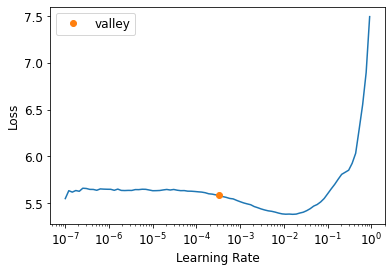

In [ ]:
learn.freeze()
lr = learn.lr_find()
learn.fit_one_cycle(3,lr_max=lr[0])

Vemos que con tan solo añadir una capa más de extracción de características, y basandonos en las mejoras estudiadas en el ejercicio anterior, hemos podido mejorar el rendimiento de nuestro modelo en casi 25% con respecto al modelo anterior. Demonstrando la facilidad que disponemos para mejorar el rendimiento de modelos pre-entrenados conforme nuestras necesidades. Si verificamos la gráfica a continuación: 

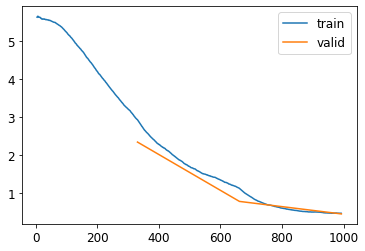

In [ ]:
learn.recorder.plot_loss() 

Vemos que tenemos un comportamiento correcto y no estabamos realizando over-fitting ya que el error en el conjunto de validación no ha crecido, parece comportarse adecuadamente. 

Además, la métrica F1(macro) nos recuerda que tenemos un equilibrio bueno entre precisión y "memoria", lo que es algo bueno para la generalización (cuando esta tiende a 1).

Si ahora comparamos con realizar un fine_tuning de toda la red: 

### Resultados Fine-Tunning 


In [ ]:
learn = vision_learner(dls,get_model,metrics=[accuracy,f1_macro])
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,F1(macro),time
0,2.612489,1.415581,0.628341,0.609900,03:03


epoch,train_loss,valid_loss,accuracy,F1(macro),time
0,1.462108,0.911057,0.757319,0.741627,03:18
1,0.958315,0.617482,0.828171,0.820380,03:18
2,0.672348,0.548202,0.859991,0.854486,02:52


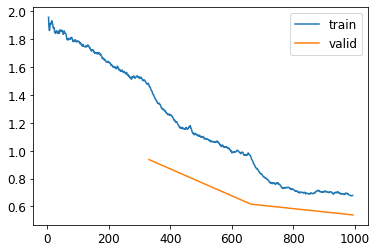

In [ ]:
learn.recorder.plot_loss() 

Vemos que no llegamos a alcanzar el rendimiento de haber añadido nosotros una capa más y una cabeza nueva pero sin embargo conseguimos más rendimiento que entrenando el modelo en el ejercicio 3.1. Sobre todo nos podemos fijar en el error en validación, que en orden de mejor a peor (menor a mayor) de ejercicios sería: 3.2, 3.3, 3.1; 

En todos los métodos se vió que no ocurría over-fitting y que el tiempo de entreno era equivalente. 
 
FastAi nos enseña la facilidad que disponemos, gracias a librerías como esta, para el uso de modelos de aprendizaje automático para la resolución de problema como la de visión por computador. Ya no es necesario reinventar la rueda, ponernos a analizar y probar desarrollar arquitecturas a ciegas cuando queremos resolver problemas "sencillos". Ahora podemos simplemente reutilizar aquello que sabemos que funciona adaptando-lo a nuestro problema de forma muy sencilla, y en caso de que fuera necesario, realizar pequeños cambios en busca de afinar aún más el rendimiento del modelo ya existente (Como lo hicimos al añadir nuestra propia "cabeza" al modelo).

En definitiva, el hecho de favorecer las herramientas y que todos dispongamos de acceso al código para entender el funcionamiento de las redes, es algo increíblemente bueno para el avance de los modelos y los estudios sobre el dominio del problema. 


# **Bonus. (3 points)**  

There are many other possibilities to improve the *BaseNet* model over CIFAR100 using suitable combinations of layers. Feel free to try your own ideas, or those interesting machine learning and computer vision approaches you've read about. Student proposals are expected for discussion and clear definition. Each proposal will be evaluated based on its innovation, complexity, and good use of PyTorch+Fastai. We will also take the mastering of the libraries used in the experiment into consideration.

**Note 1**: The Bonus will only be taken into account if, at least, 75% of the compulsory part is correct. 

**Note 2**: Since Colab only offers limited computational resources, students must try to rationally limit training time, memory consumption and size of the models used. The use of good coding practices is highly advised.

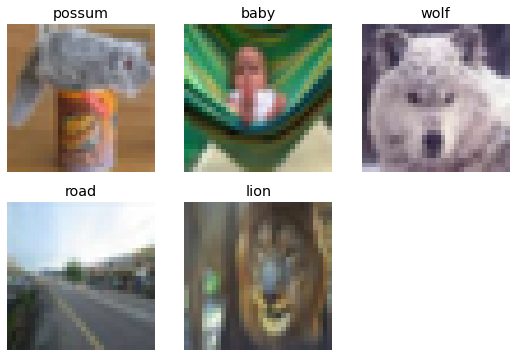

In [ ]:
ndls = DataBlock(
  blocks=(ImageBlock,CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.1,seed=42),
  get_y = parent_label,
  item_tfms=[Resize(32,method='squish')],
  # batch_tfms=[Normalize.from_stats(*cifar_stats),*aug_transforms(mult=2,batch=True,pad_mode='zeros',min_zoom=0.5,max_zoom=1.5)],
  batch_tfms=[Normalize()]
)

ndls = ndls.dataloaders(path/'train',batch_size=64) 
ndls.show_batch(max_n=5) 

Mi idea consistia en intentar adaptar las mismas mejoras que propuestas en el ejercicio 2, como el uso de la función de activación Mish y otro optimizador como podría ser el AdamW o Ranger pero en este caso para una adaptación de implementación de ResNet ya que es bastante eficaz para la resolución de problemas con imágenes pequeñas y/o para cualquier caso en el que necesitemos implementar algo de profundidad. 

Para ello tuve que intentar replicar el código de implementación de la resnet como podemos ver a continuación: 

Primeramente tenemos que codificar lo que consideremos un bloque o capa de nuestra red convolucional. Ese bloque consistirá de un par de convoluciones, normalizaciones de batches y una función de activación no lineal. (Mish como en el apartado 2). Tenemos que crear una clase a la cual podamos pasar parámetros de entrada para establecer el número de canales de entrada y el número de canales de salida. Además, para que funcione tenemos que definir un único método: Forward(). Para propagar la entrada hasta el final del bloque. 

Como consiste en un modelo de bloques residuales, una vez aplicado todas las operaciones definidas en el bloque, tenemos que devolver en Forward el resultado de las operaciones y la entrada con el mismo tamaño. De esa forma ya tenemos un bloque con "skip connection". 

In [ ]:
import torch
import torch.nn as nn

class block(nn.Module):
    def __init__(
        self, in_channels, intermediate_channels, identity_downsample=None, stride=1
    ):
        super(block, self).__init__()
        self.expansion = 4
        self.conv1 = nn.Conv2d(
            in_channels, intermediate_channels, kernel_size=1, stride=1, padding=0, bias=False
        )
        self.bn1 = nn.BatchNorm2d(intermediate_channels)
        self.conv2 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False
        )
        self.bn2 = nn.BatchNorm2d(intermediate_channels)
        self.conv3 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels * self.expansion,
            kernel_size=1,
            stride=1,
            padding=0,
            bias=False
        )
        self.bn3 = nn.BatchNorm2d(intermediate_channels * self.expansion)
        self.mish = nn.Mish()
        self.identity_downsample = identity_downsample
        self.stride = stride

    def forward(self, x):
        identity = x.clone()

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.mish(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.mish(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)

        x += identity
        x = self.mish(x)
        return x


Ahora lo que nos quedaría por implementar es lo que sería nuestra Red que utiliza estos bloques para inferir. En esa red tendremos las operaciones iniciales, y las operaciones finales. Las intermedias harán uso de la clase bloque definidas anteriormente. 

Necesitamos permitir un par de parámetros necesarios: número de  canales de la imagen, número de clases finales y el número de veces que replicamos las capas que usan el bloque residual anterior. 

He optado por eliminar la convolución que hace ResNet con un kernel de tamaño 7x7 con stride 2 y padding 3 para evitar la reducción de la imagen de entrada dado que el tamaño original ya de por si es pequeño. Incluso, he reducido el número de capas a tan solo 3. Ya que el la idea es evitar estar haciendo maxPooling. 


In [ ]:

class ResNet(nn.Module):
    def __init__(self, block, layers, image_channels, num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(image_channels, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.mish = nn.Mish()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.layer1 = self._make_layer(
            block, layers[0], intermediate_channels=32, stride=1
        )
        self.layer2 = self._make_layer(
            block, layers[1], intermediate_channels=64, stride=2
        )
        self.layer3 = self._make_layer(
            block, layers[2], intermediate_channels=128, stride=2
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.mish(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, num_residual_blocks, intermediate_channels, stride):
        identity_downsample = None
        layers = []

        # Either if we half the input space for ex, 56x56 -> 28x28 (stride=2), or channels changes
        # we need to adapt the Identity (skip connection) so it will be able to be added
        # to the layer that's ahead
        if stride != 1 or self.in_channels != intermediate_channels * 4:
            identity_downsample = nn.Sequential(
                nn.Conv2d(
                    self.in_channels,
                    intermediate_channels * 4,
                    kernel_size=1,
                    stride=stride,
                    bias=False
                ),
                nn.BatchNorm2d(intermediate_channels * 4),
            )

        layers.append(
            block(self.in_channels, intermediate_channels, identity_downsample, stride)
        )

        self.in_channels = intermediate_channels * 4

        for i in range(num_residual_blocks - 1):
            layers.append(block(self.in_channels, intermediate_channels))

        return nn.Sequential(*layers)

Notese que he disminuido el número de características que extrae cada capa, así como he arreglado valores del artículo original. (P.e en la primera capa hacían una reducción a la mitad del tamaño de la imagen original con una kernel de tamaño 7, stride=2, padding=3 y ahora hago una convolución con kernel 3 y padding=1 ya que en nuestro caso no podemos reducir mucho las imágenes ya que son enanas.

Ahora la inicialización es muy sencilla, llamamos a nuestra clase y luego a la función "Learner" de FastAi y podemos entrenar el modelo como lo hicimos en los ejercicios anteriores. 

In [ ]:
model = ResNet(block,[1,1,1],3,25) 

learn = Learner(ndls, model, metrics=[accuracy,f1_macro], 
                cbs=[MixUp(alpha=.1)],loss_func=FocalLossFlat(),
                opt_func=RAdam)

learn.summary()

ResNet (Input shape: 64 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    1728       True      
BatchNorm2d                               128        True      
Mish                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 32 x 16 x 16   
Conv2d                                    2048       True      
BatchNorm2d                               64         True      
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
____________________________________________________________________________
                     64 x 12

Vemos que hemos podido crear correctamente el modelo en FastAi y ya podemos partir a entrenarlo. 

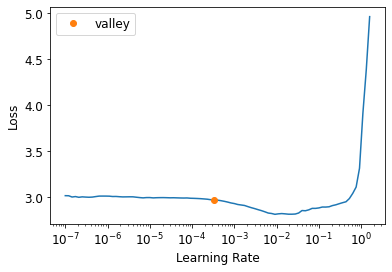

In [ ]:
lr = learn.lr_find() 

In [ ]:
learn.fit_one_cycle(10, lr_max=lr[0], cbs=EarlyStoppingCallback('valid_loss'))

epoch,train_loss,valid_loss,accuracy,F1(macro),time
0,2.628454,2.400069,0.195200,0.166673,00:22
1,2.062670,1.889473,0.318400,0.293570,00:22
2,1.767643,1.572966,0.380800,0.377920,00:22
3,1.600990,1.455040,0.424000,0.425540,00:22
4,1.432926,1.268617,0.493600,0.487114,00:22
5,1.342959,1.245012,0.492800,0.484366,00:22
6,1.244963,1.139547,0.525600,0.510660,00:22
7,1.161802,1.094872,0.541600,0.532399,00:22
8,1.132209,1.093524,0.534400,0.528390,00:22
9,1.104598,1.086795,0.550400,0.542952,00:22


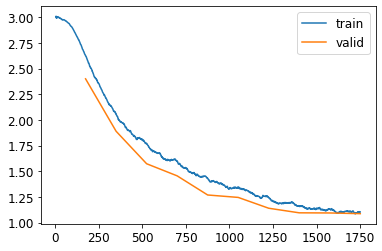

In [ ]:
learn.recorder.plot_loss() 

Vemos que no es lo mismo que cuando hacemos un FineTuning o Cargamos el modelo de ResNet ya entrenado, ya que en nuestro caso partimos directamente de un modelo con pesos "aleatorios" a los cuáles hay que dedicar bastante tiempo para mejorar los valores. Sin embargo, obtenemos valores relativamente buenos dado mi implementación, adaptación y el número de parámetros que es del orden de 20 veces menos que ResNet original. (Rendimiento similar a la mejora propuesta en el ejercicio 2). 

Quedaría por ver cuál de los dos llegaría a obtener mejor rendimiento tras entrenar con más épocas. 

# Anexo

## Modelos anteriores

Aumento increible de características:

In [ ]:
improved_net = sequential(
  nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1,groups=2),
  nn.BatchNorm2d(64,eps=1e-5,momentum=0.1, affine=True),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(128,64,kernel_size=1),
  nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1,groups=2),
  nn.BatchNorm2d(128,eps=1e-5,momentum=0.1, affine=False),
  Flatten(),
  nn.Dropout(p=0.5,inplace=False),
  nn.Linear(8*8*128,64,bias=True),
  nn.ReLU(),
  nn.Linear(64,25,bias=True),
)

Faltan modelos intermedios...disminuyendo características, añadiendo más normalización, quitando normalización... añadiendo más capas (vanishing gradient)...

Tras lectura de varios articulos: 

In [ ]:
improved_net = sequential(
  nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
  nn.ConvTranspose2d(8,16,kernel_size=5,padding=0,dilation=2),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
  nn.ConvTranspose2d(32,64,kernel_size=5,padding=0,dilation=2),
  nn.BatchNorm2d(16,eps=1e-5,momentum=0.1, affine=True),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(64,16,kernel_size=1),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1,groups=2),
  nn.Conv2d(32,64,kernel_size=1),
  nn.BatchNorm2d(64,eps=1e-5,momentum=0.1, affine=False),
  nn.ReLU(),
  nn.MaxPool2d(2),
  Flatten(),
  nn.Dropout(p=0.5,inplace=False),
  nn.Linear(7*7*64,64,bias=True),
  nn.ReLU(),
  nn.Linear(64,25,bias=True),
)

Disminuyo intensidad del dropout: 

In [ ]:
improved_net = sequential(
  nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
  nn.ConvTranspose2d(8,16,kernel_size=5,padding=0,dilation=2),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1,groups=2),
  nn.ConvTranspose2d(32,64,kernel_size=5,padding=0,dilation=2),
  nn.BatchNorm2d(16,eps=1e-5,momentum=0.1, affine=True),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(64,16,kernel_size=1),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1,groups=2),
  nn.Conv2d(32,64,kernel_size=1),
  nn.BatchNorm2d(64,eps=1e-5,momentum=0.1, affine=True),
  nn.ReLU(),
  nn.MaxPool2d(2),
  Flatten(),
  nn.Dropout(p=0.2,inplace=False),
  nn.Linear(7*7*64,64,bias=True),
  nn.ReLU(),
  nn.Linear(64,25,bias=True),
)

Totalmente convolucional: 

In [ ]:
improved_net = sequential(
  nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
  nn.ConvTranspose2d(8,16,kernel_size=5,padding=0,dilation=2),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1,groups=4),
  nn.ConvTranspose2d(32,64,kernel_size=5,padding=0,dilation=2),
  nn.BatchNorm2d(16,eps=1e-5,momentum=0.1, affine=True),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Conv2d(64,16,kernel_size=1),
  nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1,groups=4),
  nn.Conv2d(32,64,kernel_size=1),
  nn.BatchNorm2d(64,eps=1e-5,momentum=0.1, affine=True),
  nn.ReLU(),
  nn.MaxPool2d(2),
  nn.Dropout(p=0.3,inplace=True),
  nn.Conv2d(64,64,kernel_size=7),
  nn.ReLU(),
  nn.Conv2d(64,25,kernel_size=1),
  Flatten(),
)

## Optimizadores 

\[... Faltaría recordar los intermedios ...\]

In [ ]:
learn = Learner(ndls, improved_net, metrics=[accuracy,f1_macro], cbs=[MixUp(.1)],loss_func=LabelSmoothingCrossEntropyFlat(),opt_func=RAdam())

In [ ]:
learn = Learner(ndls, improved_net, metrics=[accuracy,f1_macro], cbs=[MixUp(.1)],loss_func=LabelSmoothingCrossEntropyFlat(),opt_func=partial(OptimWrapper,opt=torch.optim.AdamW,amsgrad=True))

In [ ]:
learn = Learner(ndls, improved_net, metrics=[accuracy,f1_macro], 
                cbs=[MixUp(alpha=.05)],loss_func=FocalLossFlat(),
                opt_func=partial(OptimWrapper,
                                 opt=torch.optim.AdamW,
                                 weight_decay=0.3,amsgrad=True))